# SVD_demo (why it works)
I am making this in order to better understand the RPCA methodology of Seurat 2023's integration technique.

### List of resources that have helped:
1. https://towardsdatascience.com/svd-8c2f72e264f
1. https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/#:~:text=The%20SVD%20is%20used%20widely,image%20compression%2C%20and%20denoising%20data.

### Summary of demo:
1. Generate 2 nearly identical datasets with resembling ground truths $A$ and $A2$.
1. Perturb the two datasets with transformation matricies V and V2 to create $S = A*V$ and $S2 = A2 * V2$
1. Plot S and S2 on a single axis to show misalignment
1. Plot each dataset under the other's transformation matrix $A*V2$ and $A2*V$

<img src="./SVD_demo_plan_small.jpg"  width="300" height="300">


### Generalization concept: 
This technique works because we assume our single cell datasets resemble some ground truth perturbed by its environment, aka $S$. Therefore we need to estimate their ground truth, and plot that in the transformation of the other. The technique SVD decomposes an input dataset into its estimated ground truth + transformations (usually PCA).

In [1]:
import time
from datetime import date
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from math import e

palette = [value for value in matplotlib.colors.TABLEAU_COLORS.values()]

## Generating ground truth As

In [2]:
A = pd.DataFrame({"X": np.concatenate((np.random.normal(10,1.0,5), np.random.normal(3,1.0,5))),
                 "Y": np.concatenate((np.random.normal(10,1.0,5), np.random.normal(3,1.0,5)))})
A2 = pd.DataFrame({"X": np.concatenate((np.random.normal(10,1.0,5), np.random.normal(3,1.0,5))),
                 "Y": np.concatenate((np.random.normal(10,1.0,5), np.random.normal(3,1.0,5)))})

df = pd.concat([A,A2], keys=['A', 'A2']).reset_index()

In [3]:
display(df.head())

,level_0,level_1,X,Y
0,A,0,10.127154,10.241426
1,A,1,8.981623,10.802676
2,A,2,10.396205,9.740500
3,A,3,8.877421,10.341263
4,A,4,9.838468,9.021358


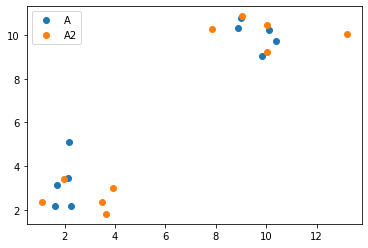

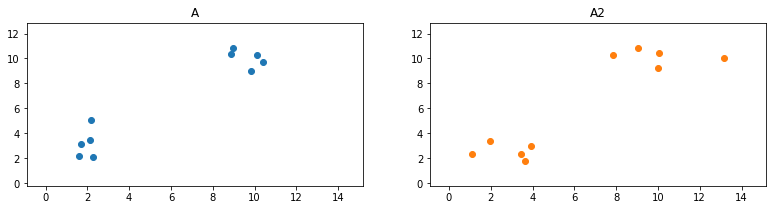

In [4]:
groups = df.groupby('level_0')
for name, group in groups:
    plt.plot(group.X, group.Y, marker='.', linestyle='', markersize=12, label=name)
plt.legend()

fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=[13.25,3])
x_min = np.min(df['X'])-2; y_min = np.min(df['Y'])-2
x_max = np.max(df['X'])+2; y_max = np.max(df['Y'])+2
for i, g in enumerate(groups):
    name, group = g
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].plot(group.X, group.Y, marker='.', linestyle='', markersize=12, c=palette[i])
    axes[i].title.set_text(name)


## Perturbing A with V to generate S
This $S$ is what is normally presented to us during single cell analysis, we normally never see $A$. I am delibratly chosing nice V matrix manipulations to demonstrate that even data that seemingly comes from the same source can look very different after a linear pertubation. In this case, I will mildly stretch $A$, and I will rotate $A2$ by 90 degrees.

In [5]:
# Defining my pertubation matricies
V = np.array([[1.1,0],
             [0,1.1]])
V2 = np.array([[-1,0],
                [0,1]])

In [6]:
# Generating my perturbed data
S = np.matmul(A,V); S.columns = ['X', 'Y']
S2 = np.matmul(A2,V2); S2.columns = ['X', 'Y']

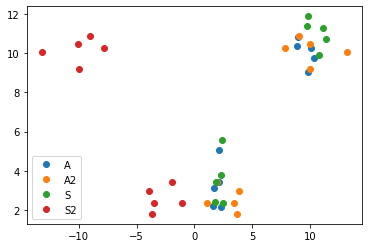

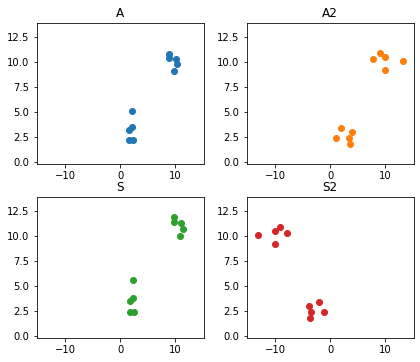

In [7]:
df = pd.concat([A,A2,S,S2], keys=['A', 'A2', "S", "S2"]).reset_index()
groups = df.groupby('level_0')
for name, group in groups:
    plt.plot(group.X, group.Y, marker='.', linestyle='', markersize=12, label=name)
plt.legend()

fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=[6,5])
fig.tight_layout(pad=1.2)
x_min = np.min(df['X'])-2; y_min = np.min(df['Y'])-2
x_max = np.max(df['X'])+2; y_max = np.max(df['Y'])+2
groups = df.groupby('level_0')
for i, g in enumerate(groups):
    x = i//2
    y = i%2
    name, group = g
    axes[x,y].set_xlim(x_min, x_max)
    axes[x,y].set_ylim(y_min, y_max)
    axes[x,y].plot(group.X, group.Y, marker='.', linestyle='', markersize=12, c=palette[i])
    axes[x,y].title.set_text(name)

## Applying reciprocal V mutations

In [8]:
# Generating my perturbed data
W = np.matmul(A,V2); W.columns = ['X', 'Y']
W2 = np.matmul(A2,V); W2.columns = ['X', 'Y']

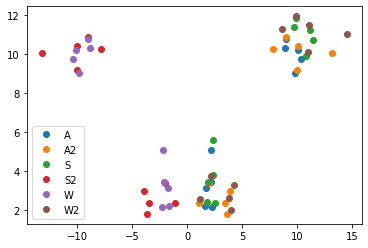

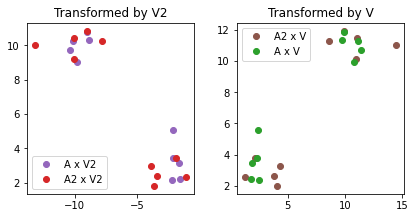

In [9]:
df = pd.concat([A,A2,S,S2,W,W2], keys=['A', 'A2', "S", "S2", "W", "W2"]).reset_index()
groups = df.groupby('level_0')
for name, group in groups:
    plt.plot(group.X, group.Y, marker='.', linestyle='', markersize=12, label=name)
plt.legend()

fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=[6,3])
fig.tight_layout(pad=1.2)
axes[0].plot(df[df['level_0'] == 'W'].X, df[df['level_0'] == 'W'].Y, marker='.', linestyle='', label = 'A x V2',markersize=12, c=palette[4])
axes[0].plot(df[df['level_0'] == 'S2'].X, df[df['level_0'] == 'S2'].Y, marker='.', linestyle='', label = 'A2 x V2',markersize=12, c=palette[3])
axes[0].set_title("Transformed by V2")
axes[0].legend()
axes[1].plot(df[df['level_0'] == 'W2'].X, df[df['level_0'] == 'W2'].Y, marker='.', linestyle='', label = 'A2 x V',markersize=12, c=palette[5])
axes[1].plot(df[df['level_0'] == 'S'].X, df[df['level_0'] == 'S'].Y, marker='.', linestyle='', label = 'A x V',markersize=12, c=palette[2])
axes[1].set_title("Transformed by V")
axes[1].legend()

## Demo conclusion
As we can see, by mapping each ground-truth matrix onto the transformed landscape of their reciprocal dataset, we seem to regenerate the ground truth observation that the two datasets come from similar backgrounds.

Try replicating this on your own, and see what happens if you change A2's X from `(np.random.normal(10,1.0,5)` -> `(np.random.normal(4,1.0,5)`. *hint* one of the clusters will ultimately overlap, but the other will not.

# SVD_demo (application)
I'm pretty sure 
* A = raw_count_matrix
* V = PCA loadings
* S = transformed_dim_reduced matrix

In [26]:
!jupyter nbconvert --to html --no-input ./SVD_demo.ipynb

[NbConvertApp] Converting notebook ./SVD_demo.ipynb to html
[NbConvertApp] Writing 643466 bytes to SVD_demo.html
